# MA(q) Parameter Estimation

The moving average model of order $q$, denoted by $\text{MA}(q)$, is defined by,

$
\begin{align}
X_t = \sum_{i=1}^q \vartheta_i \varepsilon_{t-i} + \varepsilon_t
\end{align}
$

where $\varepsilon_t$ are independent and identically distributed random variables with distribution,

$
\begin{align}
\varepsilon_i \sim \text{Normal}(0, \sigma)
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}[\varepsilon_t] = 0 \\
&\text{E}[\varepsilon_t^2] = \sigma^2 \\
&\text{E}[\varepsilon_t \varepsilon_s] = \delta_{ts} \sigma^2
\end{align}
$

Here the $\vartheta_i$ are estimated given an $MA(q)$ time series. 

## Includes

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import arima
from lib import stats
from lib.plot_config import DataPlotType

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Simulations ($\sigma = 1$)

In [2]:
nsample = 1000
σ = 1.0

θ1 = numpy.array([0.2])
ma1 = arima.maq(θ1, nsample, σ)

θ2 = numpy.array([0.2, 0.4])
ma2 = arima.maq(θ2, nsample, σ)

θ3 = numpy.array([0.2, 0.1, 0.4])
ma3 = arima.maq(θ3, nsample, σ)

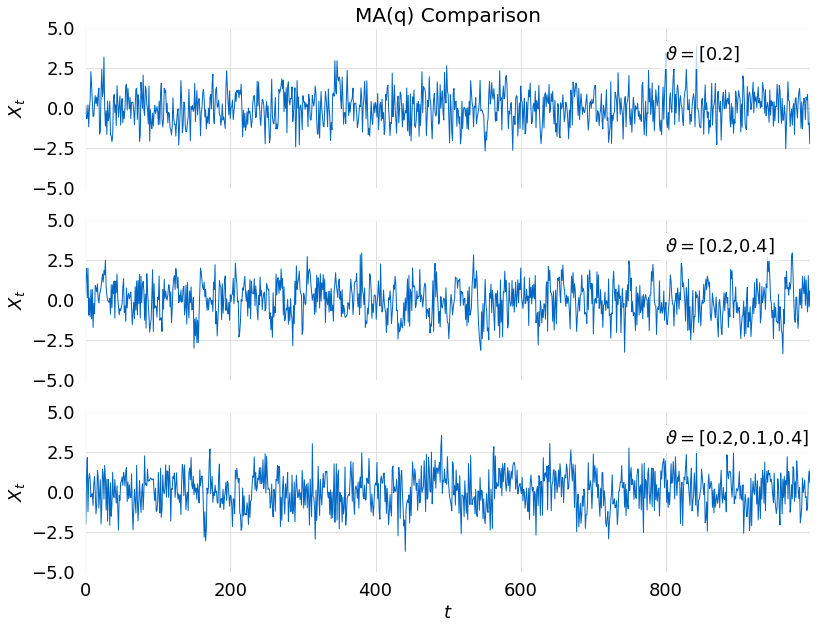

In [3]:
labels = [r"$\vartheta=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"]
title = "ΜΑ(q) Comparison"
samples = [ma1, ma2, ma3]
plots.stack(samples, ylim=[-5.0, 5.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Estimation of $\text{MA}(q)$ Parameters

$\text{MA}(q)$ parameters are estimated using `statsmodels.tsa.arima_model.ARMA`

### $\text{MA}(1)$ Example ($\varphi = 0.2$)

In [4]:
results = arima.ma_fit(ma1, 1)
results.polynomial_ma, results.bse

(array([1.        , 0.25103357]), array([0.03881942, 0.03086634, 0.04412423]))

In [5]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1396.331
Date:                Wed, 13 Apr 2022   AIC                           2798.662
Time:                        19:14:52   BIC                           2813.385
Sample:                             0   HQIC                          2804.258
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.039      0.497      0.619      -0.057       0.095
ma.L1          0.2510      0.031      8.133      0.000       0.191       0.312
sigma2         0.9557      0.044     21.660      0.000       0.869       1.042
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.65
Prob(Q):                              0.84   Prob(JB):                         0.72
Heteroskedasticity (H):               1.03   Skew:                             0.02
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $\text{MA}(2)$ Example ($\varphi = [0.2, 0.4]$)

In [6]:
results = arima.ma_fit(ma2, 2)
results.polynomial_ma, results.bse

(array([1.        , 0.21548989, 0.39277332]),
 array([0.05000236, 0.02767315, 0.02857833, 0.04603937]))

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1397.112
Date:                Wed, 13 Apr 2022   AIC                           2802.225
Time:                        19:14:52   BIC                           2821.856
Sample:                             0   HQIC                          2809.686
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0190      0.050     -0.380      0.704      -0.117       0.079
ma.L1          0.2155      0.028      7.787      0.000       0.161       0.270
ma.L2          0.3928      0.029     13.744      0.000       0.337       0.449
sigma2         0.9569      0.046     20.785      0.000       0.867       1.047
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):                 3.94
Prob(Q):                              0.39   Prob(JB):                         0.14
Heteroskedasticity (H):               1.13   Skew:                            -0.08
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $\text{MA}(3)$ Example ($\varphi = [0.2, 0.1, 0.4]$)

In [8]:
results = arima.ma_fit(ma3, 3)
results.polynomial_ma, results.bse

(array([1.        , 0.18996729, 0.10457404, 0.42929325]),
 array([0.05503021, 0.02976581, 0.0284007 , 0.02889525, 0.04831725]))

In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1425.976
Date:                Wed, 13 Apr 2022   AIC                           2861.953
Time:                        19:14:52   BIC                           2886.492
Sample:                             0   HQIC                          2871.279
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0835      0.055      1.517      0.129      -0.024       0.191
ma.L1          0.1900      0.030      6.382      0.000       0.132       0.248
ma.L2          0.1046      0.028      3.682      0.000       0.049       0.160
ma.L3          0.4293      0.029     14.857      0.000       0.373       0.486
sigma2         1.0135      0.048     20.976      0.000       0.919       1.108
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.99
Prob(Q):                              0.93   Prob(JB):                         0.37
Heteroskedasticity (H):               1.09   Skew:                            -0.02
Prob(H) (two-sided):                  0.43   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Simulations ($\sigma = 5$)

In [10]:
nsample = 1000
σ = 5.0

θ1 = numpy.array([0.2])
ma1 = arima.maq(θ1, nsample, σ)

θ2 = numpy.array([0.2, 0.4])
ma2 = arima.maq(θ2, nsample, σ)

θ3 = numpy.array([0.2, 0.1, 0.4])
ma3 = arima.maq(θ3, nsample, σ)

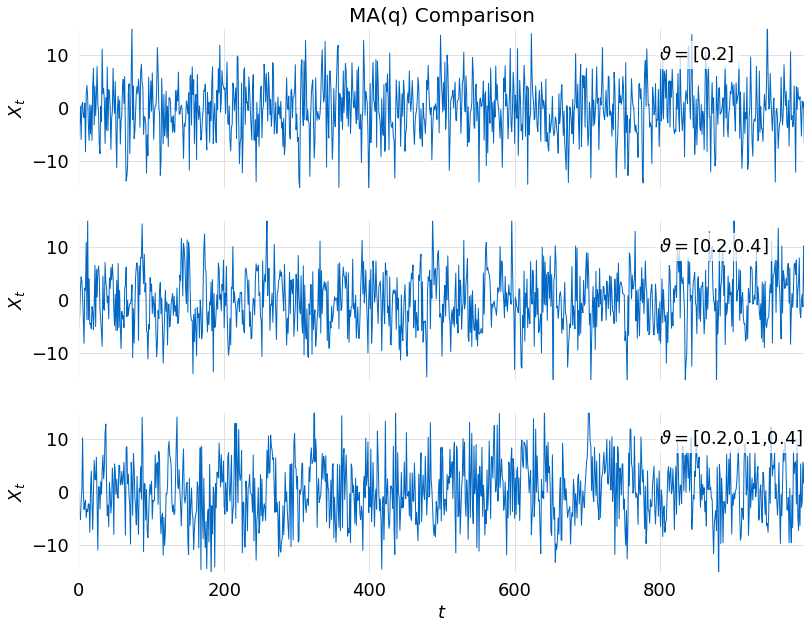

In [11]:
labels = [r"$\vartheta=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"]
title = "ΜΑ(q) Comparison"
samples = [ma1, ma2, ma3]
plots.stack(samples, ylim=[-15.0, 15.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Estimation of $\text{MA}(q)$ Parameters

$\text{MA}(q)$ parameters are estimated using `statsmodels.tsa.arima_model.ARMA`

### $\text{MA}(1)$ Example ($\varphi = 0.2$)

In [12]:
results = arima.ma_fit(ma1, 1)
results.polynomial_ma, results.bse

(array([1.        , 0.21463792]), array([0.19676762, 0.03028552, 1.14723708]))

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -3050.312
Date:                Wed, 13 Apr 2022   AIC                           6106.623
Time:                        19:14:53   BIC                           6121.347
Sample:                             0   HQIC                          6112.219
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1576      0.197     -0.801      0.423      -0.543       0.228
ma.L1          0.2146      0.030      7.087      0.000       0.155       0.274
sigma2        26.1184      1.147     22.766      0.000      23.870      28.367
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.75   Prob(JB):                         0.45
Heteroskedasticity (H):               1.02   Skew:                            -0.09
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $\text{MA}(2)$ Example ($\varphi = [0.2, 0.4]$)

In [14]:
results = arima.ma_fit(ma2, 2)
results.polynomial_ma, results.bse

(array([1.        , 0.19320803, 0.35294602]),
 array([0.24041867, 0.02918862, 0.03102045, 1.01857792]))

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -3010.161
Date:                Wed, 13 Apr 2022   AIC                           6028.321
Time:                        19:14:53   BIC                           6047.952
Sample:                             0   HQIC                          6035.783
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0519      0.240     -0.216      0.829      -0.523       0.419
ma.L1          0.1932      0.029      6.619      0.000       0.136       0.250
ma.L2          0.3529      0.031     11.378      0.000       0.292       0.414
sigma2        24.0984      1.019     23.659      0.000      22.102      26.095
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 2.51
Prob(Q):                              0.78   Prob(JB):                         0.28
Heteroskedasticity (H):               1.00   Skew:                            -0.02
Prob(H) (two-sided):                  0.97   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $\text{MA}(3)$ Example ($\varphi = [0.2, 0.1, 0.4]$)

In [16]:
results = arima.ma_fit(ma3, 3)
results.polynomial_ma, results.bse

(array([1.        , 0.24159076, 0.0645435 , 0.437982  ]),
 array([0.28054684, 0.02827371, 0.02986631, 0.0288748 , 1.11998873]))

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -3039.058
Date:                Wed, 13 Apr 2022   AIC                           6088.116
Time:                        19:14:53   BIC                           6112.654
Sample:                             0   HQIC                          6097.442
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1759      0.281      0.627      0.531      -0.374       0.726
ma.L1          0.2416      0.028      8.545      0.000       0.186       0.297
ma.L2          0.0645      0.030      2.161      0.031       0.006       0.123
ma.L3          0.4380      0.029     15.168      0.000       0.381       0.495
sigma2        25.5208      1.120     22.787      0.000      23.326      27.716
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 5.19
Prob(Q):                              0.81   Prob(JB):                         0.07
Heteroskedasticity (H):               0.77   Skew:                             0.16
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""